<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Machine Learning Para Aplicações Biomédicas</font>
## <font color='blue'>Projeto 1</font>
### <font color='blue'>Machine Learning Para Identificar Fatores Mais Relevantes Para Ocorrência de Doenças Cardíacas</font>

## Pacotes Python Usados no Projeto

In [1]:
!pip install -q -U watermark

In [2]:
# Imports
import sklearn
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')

In [3]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



## Carregando os Dados

Veja o dicionário de dados no Capítulo 4 do curso.

In [4]:
# Carrega o dataset
df_dsa = pd.read_csv('dataset.csv')

In [5]:
# Shape
df_dsa.shape

(303, 14)

In [6]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Amostra dos dados
df_dsa.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Análise Exploratória - Valores Ausentes e Análise de Correlação

In [8]:
# Há valores ausentes? Sim ou não?
df_dsa.isna().any() 

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [9]:
# Há valores ausentes? Quantos?
df_dsa.isna().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# Correlação entre as variáveis
df_dsa.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


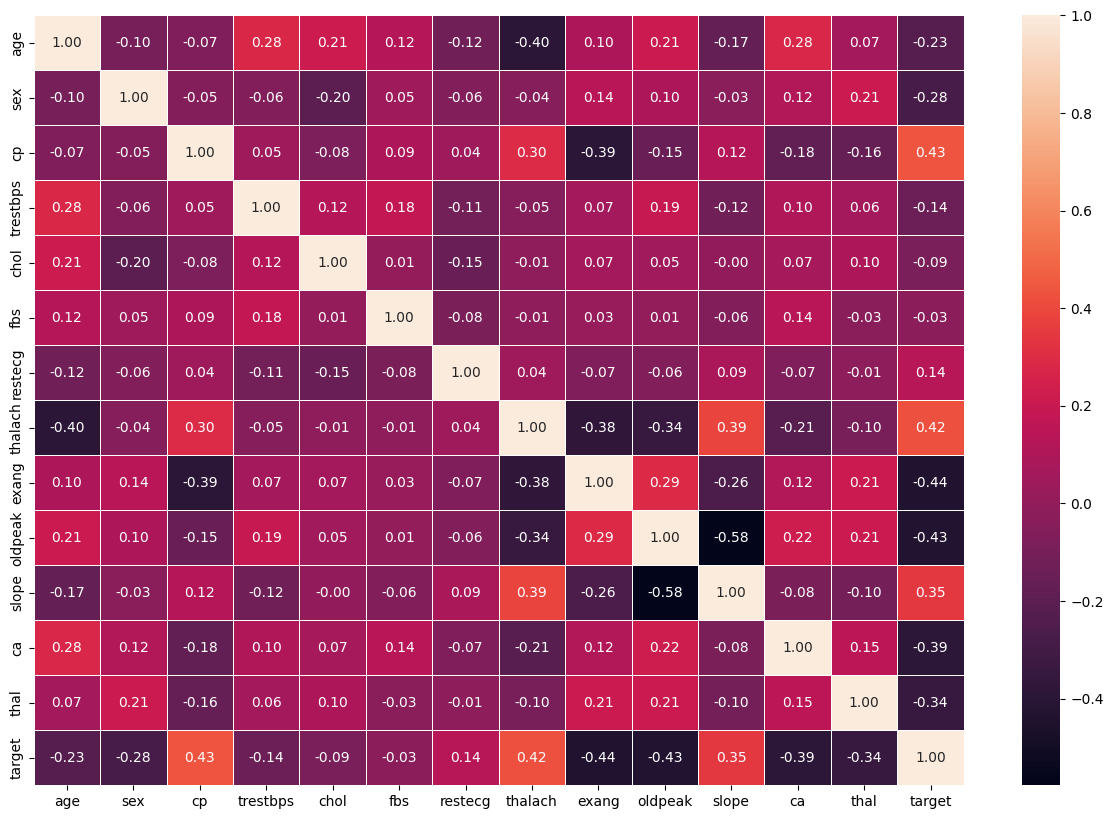

In [11]:
# Mapa de correlação
corr_matrix = df_dsa.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, fmt = ".2f")

Interpretação:

Cada célula na matriz mostra o coeficiente de correlação entre duas variáveis.

O coeficiente de correlação varia de -1 a 1.

- Correlação Positiva Forte (valores próximos a 1): Quando uma variável aumenta, a outra tende a aumentar também. 

- Correlação Negativa Forte (valores próximos a -1): Quando uma variável aumenta, a outra tende a diminuir. 

- Correlação Fraca ou Inexistente (valores próximos a 0): As variáveis não têm uma relação linear clara. 

Considerações:

Correlação não implica causalidade. Mesmo se duas variáveis estão fortemente correlacionadas, isso não significa que uma causa a outra.

Outros fatores podem influenciar as variáveis. Por isso, análises mais profundas, como a análise de causalidade, podem ser necessárias para compreender as relações entre variáveis.

## Análise Exploratória - Quem Define a Variável Target?

In [12]:
# Valores da variável target 
df_dsa['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [13]:
# Percentual
countHaveDisease = len(df_dsa[df_dsa.target==1])
countNoDisease = len(df_dsa[df_dsa.target==0])
print("Percentual de Pacientes Com Doença: {:.2f}%".format((countHaveDisease / (len(df_dsa.target)) * 100)))
print("Percentual de Pacientes Sem Doença: {:.2f}%".format((countNoDisease / (len(df_dsa.target)) * 100)))

Percentual de Pacientes Com Doença: 54.46%
Percentual de Pacientes Sem Doença: 45.54%


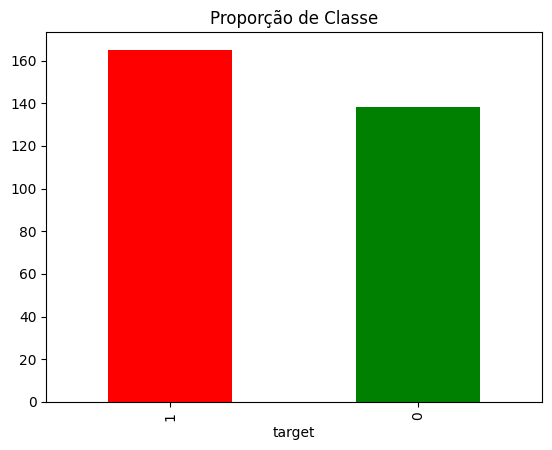

In [14]:
# Visualizando graficamente
df_dsa['target'].value_counts().plot(kind = 'bar',
                                     color = ['red','green'],
                                     title = "Proporção de Classe");

## Análise Exploratória - Tabela Cruzada

In [15]:
# Variável de gênero
df_dsa['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [16]:
# Tabela cruzada (Crosstab) entre gênero e variável target
pd.crosstab(df_dsa['target'], df_dsa['sex'])

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

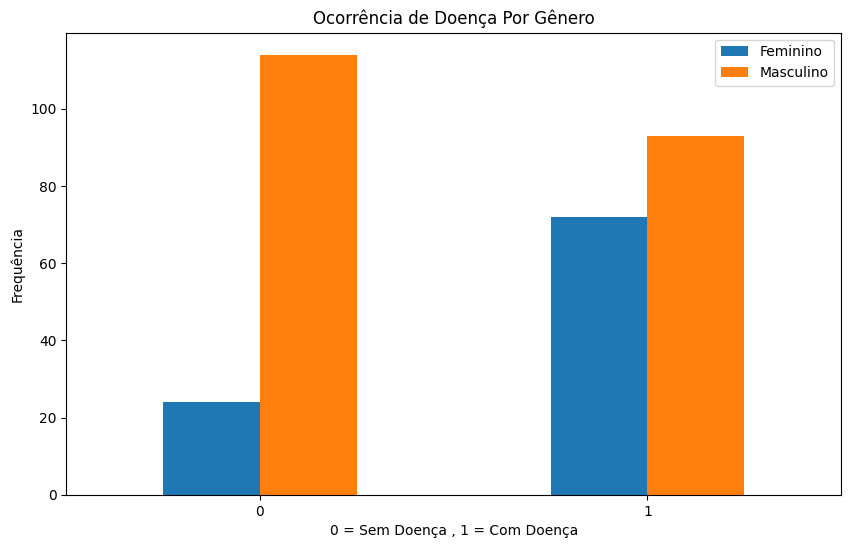

In [17]:
# Plot da Crosstab
pd.crosstab(df_dsa['target'], df_dsa['sex']).plot(kind = "bar", figsize = (10,6));
plt.title("Ocorrência de Doença Por Gênero")
plt.xlabel("0 = Sem Doença , 1 = Com Doença")
plt.ylabel("Frequência")
plt.legend(["Feminino", "Masculino"])
plt.xticks(rotation = 0)

In [18]:
# Relação da doença cardíaca com o tipo de dor torácica
pd.crosstab(df_dsa['cp'], df_dsa['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


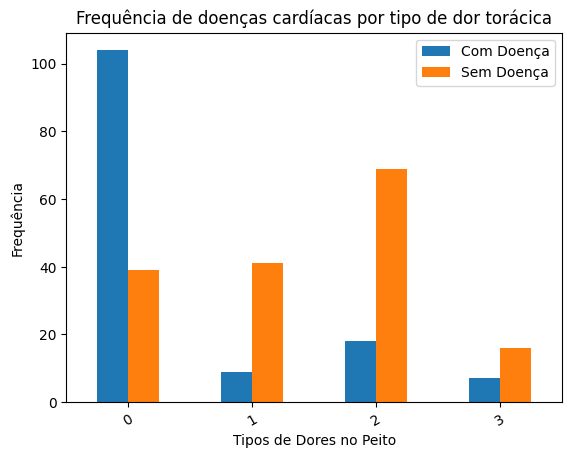

In [19]:
# Crosstab visual
pd.crosstab(df_dsa['cp'], df_dsa['target']).plot(kind = 'bar')
plt.title("Frequência de doenças cardíacas por tipo de dor torácica")
plt.xlabel("Tipos de Dores no Peito")
plt.ylabel("Frequência")
plt.legend(['Com Doença', 'Sem Doença'])
plt.xticks(rotation = 30);

In [20]:
# Contagem por categoria
df_dsa['fbs'].value_counts()

fbs
0    258
1     45
Name: count, dtype: int64

In [21]:
# Compara a coluna Alvo, ou seja, doença cardíaca com coluna de açúcar no sangue em jejum
pd.crosstab(df_dsa['target'], df_dsa['fbs'])

fbs,0,1
target,,
0,116,22
1,142,23


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

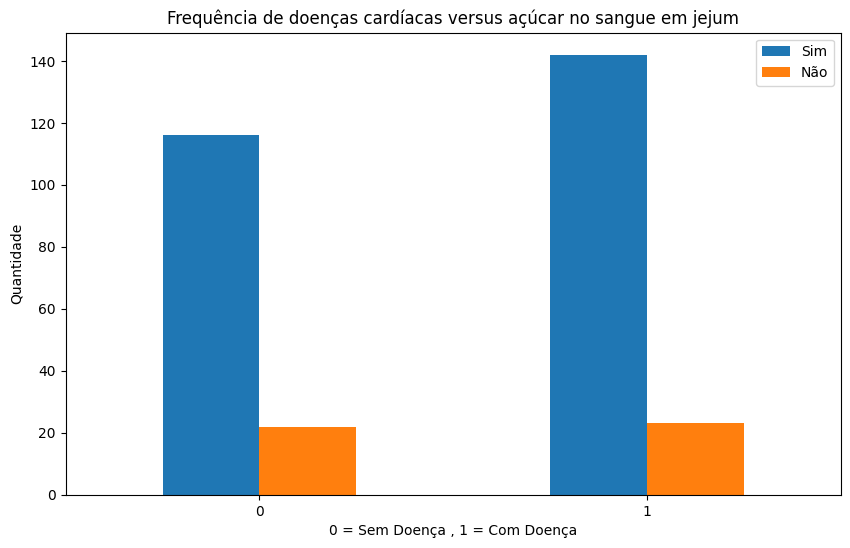

In [22]:
# Plot da crosstab
pd.crosstab(df_dsa['target'], df_dsa['fbs']).plot(kind = "bar",figsize = (10,6));
plt.title("Frequência de doenças cardíacas versus açúcar no sangue em jejum")
plt.xlabel("0 = Sem Doença , 1 = Com Doença")
plt.ylabel("Quantidade")
plt.legend(["Sim", "Não"])
plt.xticks(rotation = 0)

In [23]:
# Contagem de valores
df_dsa['restecg'].value_counts()

restecg
1    152
0    147
2      4
Name: count, dtype: int64

In [24]:
# Crosstab
pd.crosstab(df_dsa['target'], df_dsa['restecg'])

restecg,0,1,2
target,,,
0,79,56,3
1,68,96,1


In [25]:
# Contagem de valores
df_dsa['thal'].value_counts()

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

In [26]:
# Crosstab
pd.crosstab(df_dsa['target'], df_dsa['thal'])

thal,0,1,2,3
target,,,,
0,1,12,36,89
1,1,6,130,28


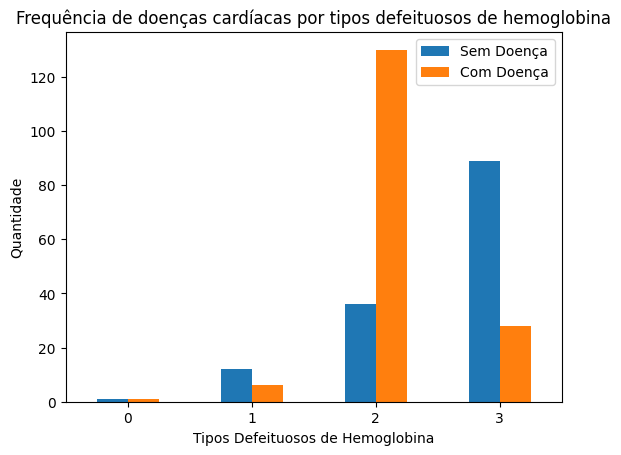

In [27]:
# Crosstab visual
pd.crosstab(df_dsa['thal'],df_dsa['target']).plot(kind = 'bar')
plt.title("Frequência de doenças cardíacas por tipos defeituosos de hemoglobina")
plt.xlabel("Tipos Defeituosos de Hemoglobina")
plt.ylabel("Quantidade")
plt.legend(['Sem Doença','Com Doença'])
plt.xticks(rotation = 0);

## Análise Exploratória - Violin Plot Para Análise Multivariada

Text(0.5, 1.0, 'Gráfico sobre a relação entre frequência cardíaca máxima, tipos de dor no peito e gênero')

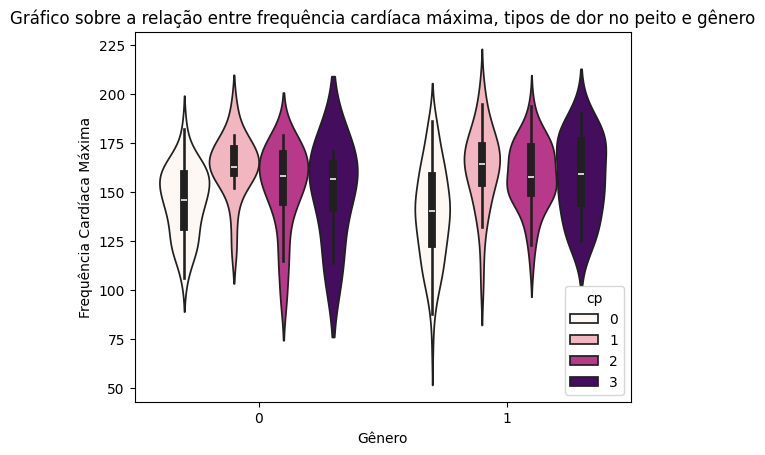

In [28]:
# Gráfico sobre a relação entre a frequência cardíaca máxima e os tipos de dor no peito em relação ao gênero
sns.violinplot(x = "sex", y = "thalach", hue = "cp", data = df_dsa, palette = "RdPu")
plt.xlabel('Gênero')
plt.ylabel('Frequência Cardíaca Máxima')
plt.title("Gráfico sobre a relação entre frequência cardíaca máxima, tipos de dor no peito e gênero")

**Análise**:

Os gráficos de violino do gênero masculino apresentam maior mediana em relação ao feminino e a dor torácica tipo 1 que é angina atípica é maior em relação à frequência cardíaca máxima em ambos os genêros.

## Análise Exploratória - Facetgrid

Text(910.7469051932369, 0.5, 'thal(haemoglobin defective) types')

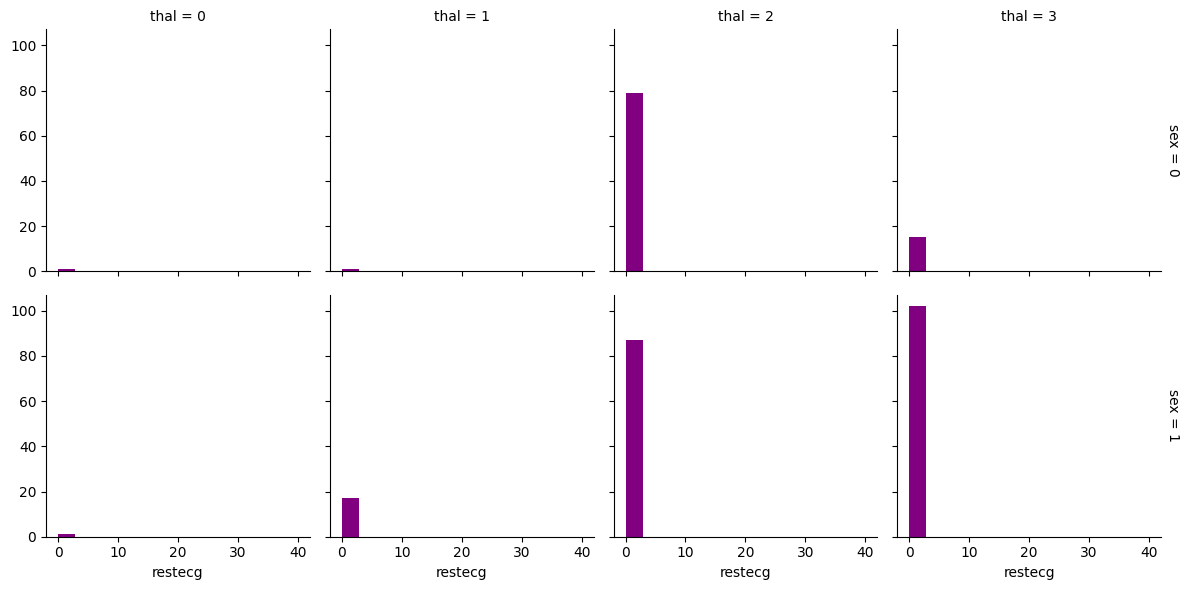

In [29]:
# Gráfico sobre a relação entre a taxa de eletrocardiograma em repouso e thal (tipos defeituosos de hemoglobina) 
# em relação ao gênero
grid = sns.FacetGrid(df_dsa, row = "sex", col = "thal", margin_titles = True)
grid.map(plt.hist, "restecg", bins = np.linspace(0, 40, 15), color = "Purple");
plt.xlabel('restecg')
plt.ylabel('thal(haemoglobin defective) types')

**Análise**:

Os gráficos da frequência do eletrocardiograma em repouso e do defeito de redução da hemoglobina em relação ao gênero mostram que ambos os gêneros têm o mesmo restecg, mas o defeito de redução da hemoglobina tipo 2 é maior nos homens, enquanto o efeito reverso da redução da hemoglobina tipo 3 é maior nos homens e menor nas mulheres. 

Portanto, é difícil para as mulheres recuperar o conteúdo de hemoglobina se houver uma perda, por outro lado, é mais fácil para os homens recuperar o conteúdo de hemoglobina.

## Análise Exploratória - Histograma e Scatterplot

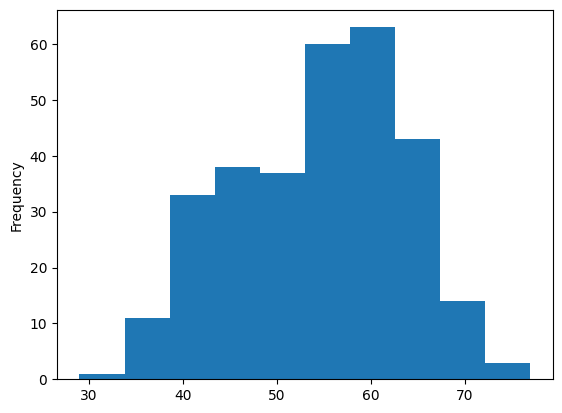

In [30]:
# Verificando a distribuição da coluna de idade com um histograma
df_dsa['age'].plot(kind = 'hist');

In [31]:
# Verificando contagem de valores em frequência cardíaca máxima alcançada
df_dsa['thalach'].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

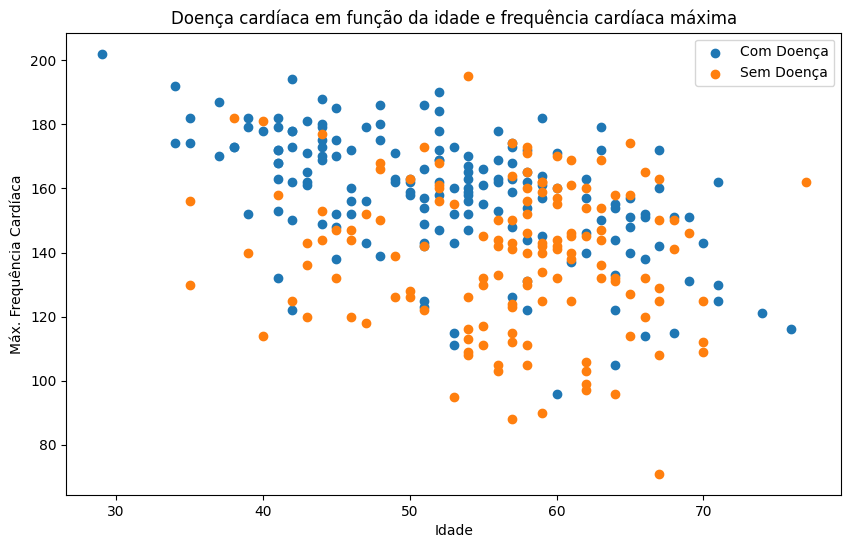

In [32]:
# Plot
plt.figure(figsize=(10,6))

# Target = 1
plt.scatter(x = df_dsa[df_dsa['target']==1]['age'], y = df_dsa.thalach[df_dsa.target==1])

# Target = 0
plt.scatter(x = df_dsa[df_dsa['target']==0]['age'], y = df_dsa.thalach[df_dsa.target==0],);

# Labels e título
plt.title("Doença cardíaca em função da idade e frequência cardíaca máxima")
plt.xlabel("Idade")
plt.ylabel("Máx. Frequência Cardíaca")
plt.legend(["Com Doença", "Sem Doença"])

<Axes: ylabel='Density'>

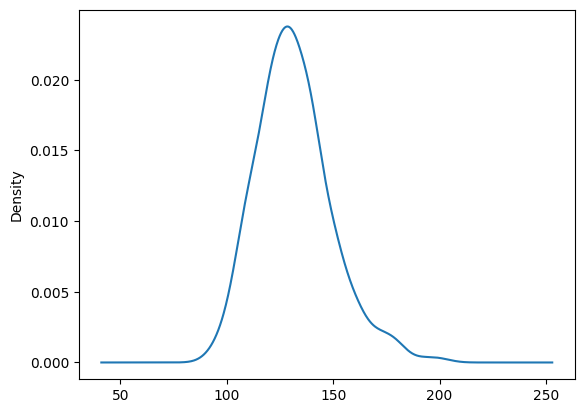

In [33]:
# Histograma da variável de pressão sanguínea na admissão no hospital com a curva KDE
df_dsa['trestbps'].plot(kind = 'kde')

## Análise Exploratória - StripPlot

Text(0.5, 1.0, 'Relação Tipos de Dor no Peito x Pressão Sanguinea x Gênero')

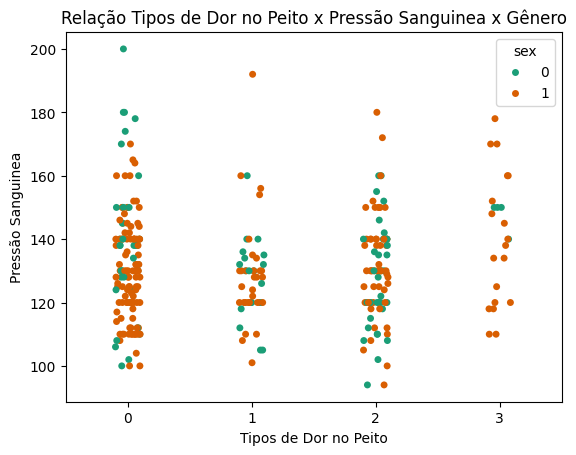

In [34]:
# Gráfico sobre a relação entre os tipos de dor no peito em repouso e a taxa de pressão 
# arterial em relação ao gênero
sns.stripplot(x = "cp", y = "trestbps", hue = "sex", data = df_dsa, palette = "Dark2")
plt.xlabel('Tipos de Dor no Peito')
plt.ylabel('Pressão Sanguinea')
plt.title(label = "Relação Tipos de Dor no Peito x Pressão Sanguinea x Gênero", loc = 'center')

## Análise Exploratória - CatPlot

Text(0.5, 1.0, 'Relação entre a inclinação do pico do segmento ST e o nível de colesterol em relação ao gênero')

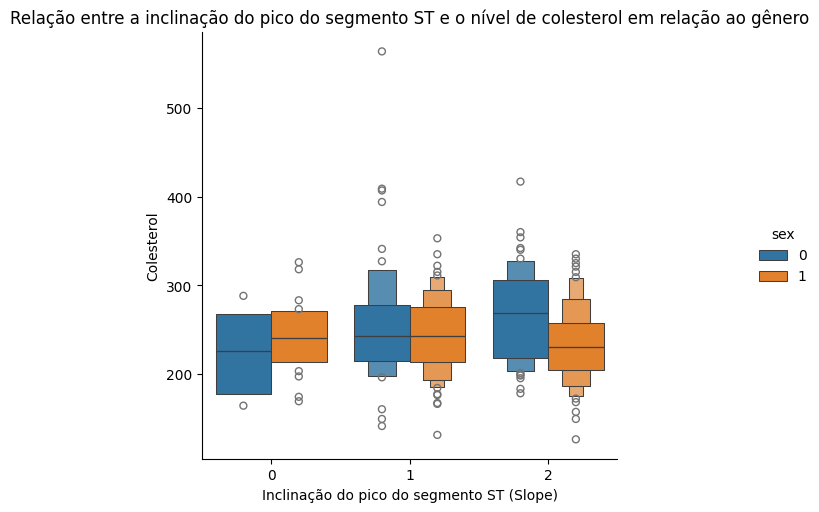

In [35]:
# Gráfico sobre a relação entre a inclinação do pico do segmento ST e o nível de colesterol em relação ao gênero
sns.catplot(x = "slope", y = "chol", hue = "sex", kind = "boxen", data = df_dsa)
plt.xlabel('Inclinação do pico do segmento ST (Slope)')
plt.ylabel('Colesterol')
plt.title(label = "Relação entre a inclinação do pico do segmento ST e o nível de colesterol em relação ao gênero",
          loc = 'center')

Text(0.5, 1.0, 'Tipo de dor no peito em relação à idade e gênero')

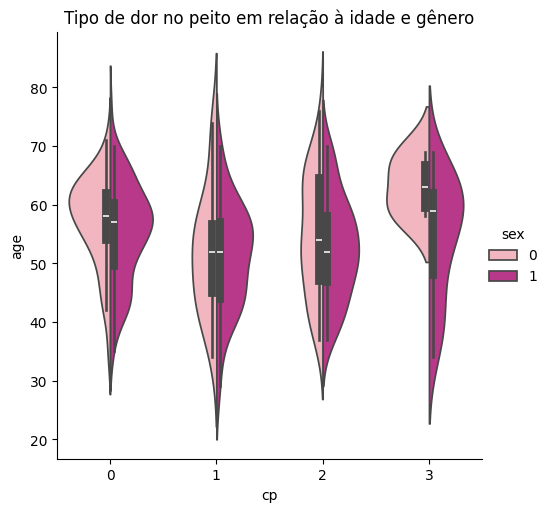

In [36]:
# Catplot como violin plot
sns.catplot(data = df_dsa, kind = "violin", x = "cp", y = "age", hue = "sex", split = True, palette = "RdPu")
plt.title("Tipo de dor no peito em relação à idade e gênero")

Continuaremos no próximo capítulo.

## Modelagem Preditiva - Construção, Treino e Avaliação do Modelo

In [37]:
df_dsa.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
# Preparando os dados para o modelo
X = df_dsa.drop('target', axis = 1)  # Variáveis independentes
y = df_dsa['target']  # Variável dependente

In [39]:
# Dividindo os dados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
# Criando e treinando o modelo RandomForest
modelo_dsa = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [41]:
# Treina o modelo
modelo_dsa.fit(X_treino, y_treino)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
# Fazendo previsões com o modelo usando dados de teste
y_pred = modelo_dsa.predict(X_teste)

In [43]:
# Avaliando o modelo com dados de teste
accuracy = accuracy_score(y_teste, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.8360655737704918


## Modelagem Preditiva - Usando o Modelo Para Extrair Atributos Mais Relevantes

In [44]:
# Extraindo a importância das características
feature_importances = modelo_dsa.feature_importances_
features = X.columns

In [45]:
# Criando um DataFrame para facilitar a visualização
importances_df = pd.DataFrame({'Variáveis': features, 'Importância': feature_importances})

In [46]:
# Ordenando as características pela importância
importances_df = importances_df.sort_values(by = 'Importância', ascending = False)

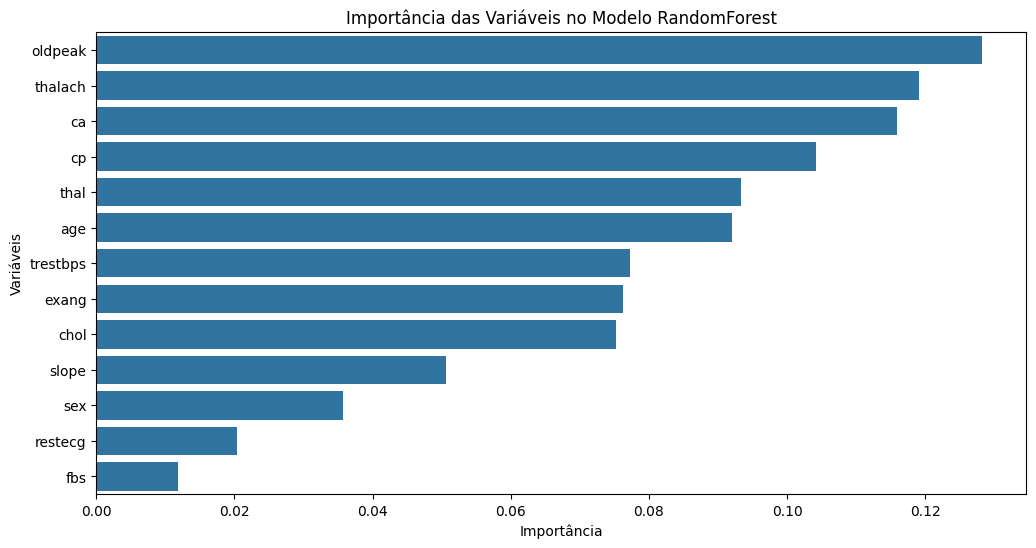

In [47]:
# Visualizando a importância das características
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Importância', y = 'Variáveis', data = importances_df)
plt.title('Importância das Variáveis no Modelo RandomForest')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.show()

## Versão Final do Modelo com as Variáveis Mais Relevantes

In [48]:
# Selecionando as 10 variáveis mais importantes
top_variables = importances_df['Variáveis'].head(10).tolist()

In [49]:
top_variables

['oldpeak',
 'thalach',
 'ca',
 'cp',
 'thal',
 'age',
 'trestbps',
 'exang',
 'chol',
 'slope']

In [50]:
# Preparando os dados com apenas as variáveis selecionadas
X_top = X[top_variables]

In [51]:
# Dividindo os dados em conjuntos de treino e teste
X_treino_top, X_teste_top, y_treino, y_teste = train_test_split(X_top, y, test_size = 0.2, random_state = 42)

In [52]:
# Criando e treinando um novo modelo RandomForest com as variáveis selecionadas
modelo_dsa_top = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [53]:
# Treino do modelo
modelo_dsa_top.fit(X_treino_top, y_treino)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
# Avaliando o novo modelo
y_pred_top = modelo_dsa_top.predict(X_teste_top)
accuracy_top = accuracy_score(y_teste, y_pred_top)
print("Acurácia do Modelo com as 10 Variáveis Mais Relevantes:", accuracy_top)

Acurácia do Modelo com as 10 Variáveis Mais Relevantes: 0.8524590163934426


In [55]:
print(classification_report(y_teste, y_pred_top))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [56]:
# Matriz de Confusão
confusion_matrix(y_teste, y_pred_top)

array([[24,  5],
       [ 4, 28]])

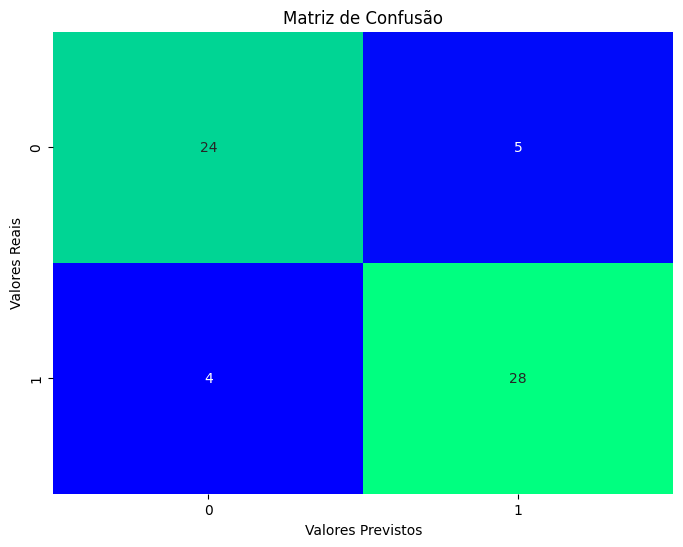

In [57]:
# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_teste, y_pred_top)

# Criando um gráfico para a matriz de confusão
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', cmap = 'winter', cbar = False)
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.show()

In [58]:
df_dsa.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
top_variables

['oldpeak',
 'thalach',
 'ca',
 'cp',
 'thal',
 'age',
 'trestbps',
 'exang',
 'chol',
 'slope']

In [60]:
# Salvando o modelo treinado
dump(modelo_dsa_top, 'modelo_dsa.joblib')

['modelo_dsa.joblib']

## Deploy do Modelo e Uso com Novos Dados

In [61]:
# Carregar o modelo
modelo_final = load('modelo_dsa.joblib')

In [62]:
# Exemplo de novos dados para previsão
novos_dados = pd.DataFrame({'oldpeak': [1.4],
                            'thalach': [173],
                            'ca': [0],
                            'cp': [3],
                            'thal': [2],
                            'age': [43],
                            'trestbps': [132],
                            'exang': [1],
                            'chol': [234],
                            'slope': [2]})

In [63]:
type(novos_dados)

pandas.core.frame.DataFrame

In [64]:
print(novos_dados)

   oldpeak  thalach  ca  cp  thal  age  trestbps  exang  chol  slope
0      1.4      173   0   3     2   43       132      1   234      2


In [65]:
# Fazendo previsão com os novos dados
previsao = modelo_final.predict(novos_dados)

In [66]:
print("Previsão:", previsao)

Previsão: [1]


> Valor 1 indica que o paciente vai desenvolver (ou já desenvolveu) doença cardíaca. O valor 0 indica que a não ocorrência de doença cardíaca nesse paciente.

In [67]:
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [68]:
#%watermark -v -m

In [69]:
#%watermark --iversions

# Fim